Michael Wendell

MovieLens 25M Dataset

This notebook's purpose is to analyze MovieLens movie reviews.

## Data Import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv('movies.csv')
movies.set_index('movieId', inplace=True)
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62423 entries, 1 to 209171
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   62423 non-null  object
 1   genres  62423 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


In [3]:
ratings = pd.read_csv('ratings.csv', dtype={
    'movieId': 'int32',
    'userId': 'int32',
    'rating': 'float32'
})
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int32  
 1   movieId    int32  
 2   rating     float32
 3   timestamp  int64  
dtypes: float32(1), int32(2), int64(1)
memory usage: 476.8 MB


In [4]:
print("There are", movies['title'].count(), "movies in the dataset")

There are 62423 movies in the dataset


In [5]:
print("There are", ratings['userId'].nunique(), "users in the MovieLens dataset")

There are 162541 users in the MovieLens dataset


In [6]:
print("In total there are", ratings['rating'].count(), "ratings in the MovieLens dataset")

In total there are 25000095 ratings in the MovieLens dataset


Text(0.5, 0, 'User')

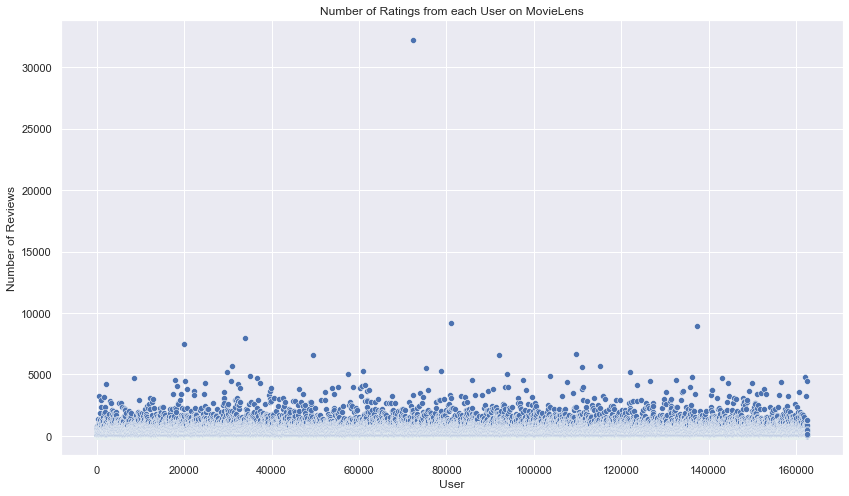

In [7]:
rat_per_user = ratings.groupby(['userId'])['movieId'].count().reset_index(name='count')
sns.set(rc={'figure.figsize':(14,8)})
sns.scatterplot(x='userId', y='count', data=rat_per_user)
plt.title('Number of Ratings from each User on MovieLens')
plt.ylabel('Number of Reviews')
plt.xlabel('User')

From the scatterplot, one can see the few outliers that have contributed more than 5000 reviews very clearly. Most of the users look to have reviwed 2000 or less movies.

Text(0.5, 0, 'User')

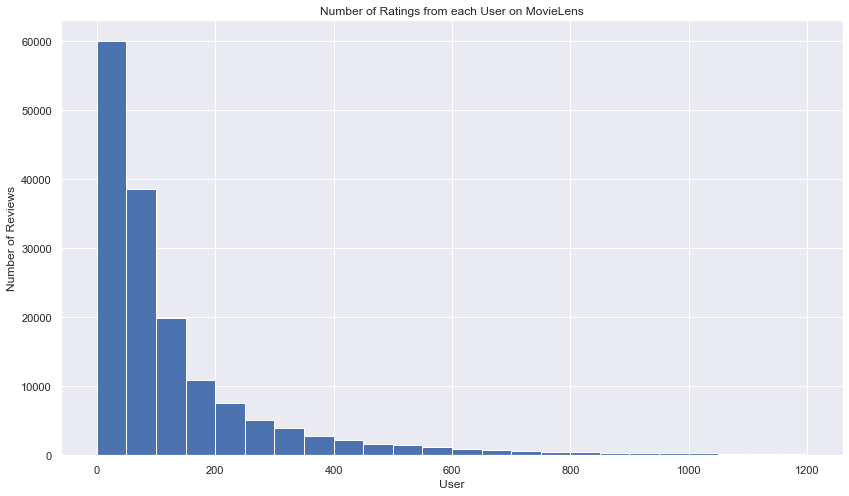

In [8]:
rat_per_user['count'].hist(bins=(np.arange(start=0, stop=1250, step=50)))
plt.title('Number of Ratings from each User on MovieLens')
plt.ylabel('Number of Reviews')
plt.xlabel('User')

The histogram here provides a better view of how most of the users are distributed. Here it can be seen that a majority of users have only left 200 reviews or less.

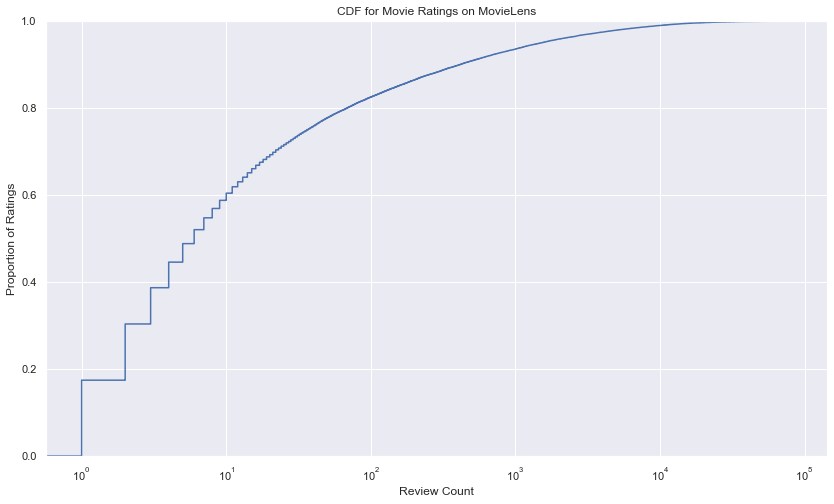

In [9]:
rat_per_item =  ratings.groupby(['movieId'])['rating'].count().reset_index(name='count')
sns.ecdfplot(rat_per_item['count'], log_scale=True)
plt.title('CDF for Movie Ratings on MovieLens')
plt.ylabel('Proportion of Ratings')
plt.xlabel('Review Count')
plt.show()

The CDF plot above shows that around 60% of the movies have 10 different reviews or less, while about 5% have more than 1000 reviews.

Text(0.5, 0, 'Average Movie Ratings')

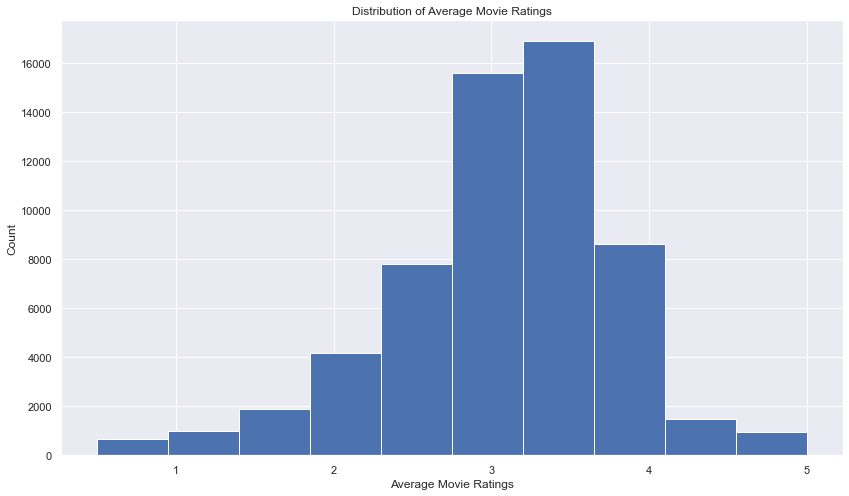

In [10]:
avg_rats = ratings.groupby(['movieId'])['rating'].agg(['mean'])
avg_rats['mean'].hist()
plt.title('Distribution of Average Movie Ratings')
plt.ylabel('Count')
plt.xlabel('Average Movie Ratings')

The histogram distrobution shows that the average rating for each movies centers around 3 out of 5.

In [11]:
rat_per_item = ratings.join(movies, on='movieId')
rat_per_item =  rat_per_item.groupby(['movieId', 'title'])['rating'].count().reset_index(name='count')
rat_per_item.nlargest(10, 'count')

,movieId,title,count
351,356,Forrest Gump (1994),81491
314,318,"Shawshank Redemption, The (1994)",81482
292,296,Pulp Fiction (1994),79672
585,593,"Silence of the Lambs, The (1991)",74127
2480,2571,"Matrix, The (1999)",72674
257,260,Star Wars: Episode IV - A New Hope (1977),68717
475,480,Jurassic Park (1993),64144
522,527,Schindler's List (1993),60411
108,110,Braveheart (1995),59184
2867,2959,Fight Club (1999),58773


The 10 most popular movies are listed above.

In [12]:
avg_rats = ratings.join(movies, on='movieId')
avg_rats = avg_rats.groupby(['movieId', 'title'])['rating'].agg(['mean', 'count'])
avg_rats.nlargest(10, 'mean')

,,mean,count
movieId,title,,
27914,"Hijacking Catastrophe: 9/11, Fear & the Selling of American Empire (2004)",5.0,1
31945,Always a Bridesmaid (2000),5.0,1
83161,Deadly Delicious (Shuang Shi Ji) (2008),5.0,1
86975,As Seen Through These Eyes (2008),5.0,1
92783,Latin Music USA (2009),5.0,1
93991,"Eye for an Eye, An (Silmä silmästä) (1999)",5.0,1
95494,Joffrey: Mavericks of American Dance (2012),5.0,1
96799,Puckoon (2002),5.0,1
99243,"Parasites, Les (1999)",5.0,1


The 10 movies with the highest average ratings are shown by the above list, but as one can see most of these items have very few ratings making this list not very useful.

In [13]:
gmean = ratings['rating'].mean()
item_vals = ratings.groupby('movieId')['rating'].agg(['sum', 'count', 'mean'])
item_vals['dmean'] = (item_vals['sum'] + (5 * gmean))/(item_vals['count'] + 5)
item_vals = item_vals.join(movies, on='movieId')
item_vals.nlargest(10, 'dmean')

,sum,count,mean,dmean,title,genres
movieId,,,,,,
171011,5039.0,1124,4.483096,4.477811,Planet Earth II (2016),Documentary
159817,7800.0,1747,4.464797,4.461443,Planet Earth (2006),Documentary
318,359627.0,81482,4.413576,4.413507,"Shawshank Redemption, The (1994)",Crime|Drama
170705,5964.5,1356,4.398599,4.394525,Band of Brothers (2001),Action|Drama|War
858,227019.0,52498,4.324336,4.324238,"Godfather, The (1972)",Crime|Drama
171495,1198.5,277,4.326715,4.308327,Cosmos,(no genres listed)
50,237207.5,55366,4.284353,4.284263,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
179135,2827.0,659,4.289833,4.282301,Blue Planet II (2017),Documentary
1221,145701.0,34188,4.261758,4.261617,"Godfather: Part II, The (1974)",Crime|Drama


Using a damped average rating with a factor of 5, one can see completly different movies that have are higher rated with more reviews. This list has a much better grasp on the best rated items.

In [14]:
user_rev = ratings.join(movies, on='movieId')

In [15]:
toys_rev = user_rev.loc[user_rev['title'] == 'Toy Story (1995)']
toys_users = user_rev[user_rev['userId'].isin(toys_rev['userId'])]
toys_users = toys_users.groupby(['movieId', 'title'])['rating'].agg(['count', 'mean'])
toys_users.nlargest(6, 'count')

,,count,mean
movieId,title,,
1,Toy Story (1995),57309,3.893708
356,Forrest Gump (1994),39240,4.022451
260,Star Wars: Episode IV - A New Hope (1977),36743,4.171570
296,Pulp Fiction (1994),35514,4.193037
318,"Shawshank Redemption, The (1994)",34655,4.423590
480,Jurassic Park (1993),34210,3.679436


The above list shows the 5 most popular movies among users who also watched Toy Story (not counting Toy Story itself).

In [16]:
things_rev = user_rev.loc[user_rev['title'] == '10 Things I Hate About You (1999)']
things_users = user_rev[user_rev['userId'].isin(things_rev['userId'])]
things_users = things_users.groupby(['movieId', 'title'])['rating'].agg(['count', 'mean'])
things_users.nlargest(6, 'count')

,,count,mean
movieId,title,,
2572,10 Things I Hate About You (1999),13710,3.533078
356,Forrest Gump (1994),9309,3.979805
2571,"Matrix, The (1999)",8981,4.108897
2858,American Beauty (1999),8590,4.084284
2959,Fight Club (1999),8215,4.181010
2762,"Sixth Sense, The (1999)",8155,3.999142


The above list shows the 5 most popular movies among users who also watched 10 Things I Hate About You (not counting 10 Things I Hate About You). A common trend seems to be that the movies made around the same time as the selected movie were more popular with the users.

In [17]:
item_rev = user_rev.loc[user_rev['title'] == 'Lord of the Rings: The Fellowship of the Ring, The (2001)']
item_users = user_rev[user_rev['userId'].isin(item_rev['userId'])]
item_users = item_users.groupby(['movieId', 'title'])['rating'].agg(['count', 'mean'])
item_users.nlargest(6, 'count')

,,count,mean
movieId,title,,
4993,"Lord of the Rings: The Fellowship of the Ring, The (2001)",55736,4.091189
5952,"Lord of the Rings: The Two Towers, The (2002)",46335,4.099816
7153,"Lord of the Rings: The Return of the King, The (2003)",45315,4.130056
2571,"Matrix, The (1999)",44537,4.183297
318,"Shawshank Redemption, The (1994)",36871,4.381533
356,Forrest Gump (1994),36869,4.023461


This list shows the 5 most popular movies among users who also watched The Lord of the Rings: The Fellowship of the Ring. Unsurprisingly it shows the other two movies that are part of the trilogy were the two most popular.